In [5]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from collections import Counter

In [6]:
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [19]:
preprocessed_objectives = pd.read_csv("../Phase2_preprocessing_featureExtraction/preprocessed_data/preprocessed_objectives.csv")
preprocessed_descriptions = pd.read_csv("../Phase2_preprocessing_featureExtraction/preprocessed_data/preprocessed_descriptions.csv")
preprocessed_outcomes = pd.read_csv("../Phase2_preprocessing_featureExtraction/preprocessed_data/preprocessed_outcomes.csv")

## Embedding

In [21]:
pip -q install sentence-transformers

In [22]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [23]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [24]:
cleaned_texts = [None]*len(df)

for i in range(len(df)):
    if preprocessed_objectives[i] is not None:
        cleaned_texts[i] = preprocessed_objectives[i]
    elif preprocessed_outcomes[i] is not None:
        cleaned_texts[i] = preprocessed_outcomes[i]
len(cleaned_texts)

3994

In [25]:
embeddings = model.encode(cleaned_texts, normalize_embeddings=True)

In [26]:
embeddings.shape

(3994, 384)

In [27]:
# Calculate cosine similarity to check the quality of embeddings
from sentence_transformers.util import cos_sim

texts_vectors = np.zeros((len(cleaned_texts), len(cleaned_texts)))
for i in range(len(cleaned_texts)):
    if i % 750 == 0:
        print(f'Computed similarity of {i}/{len(cleaned_texts)} embeddings!')
    texts_vectors[i:,i] = cos_sim(embeddings[i], embeddings[i:])
print(f'Computed similarity of {len(cleaned_texts)}/{len(cleaned_texts)} embeddings!')

Computed similarity of 0/3994 embeddings!
Computed similarity of 750/3994 embeddings!
Computed similarity of 1500/3994 embeddings!
Computed similarity of 2250/3994 embeddings!
Computed similarity of 3000/3994 embeddings!
Computed similarity of 3750/3994 embeddings!
Computed similarity of 3994/3994 embeddings!


In [28]:
texts_vectors[:5]

array([[0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.00000012, 1.00000012, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.00000012, 1.00000024, 1.00000012, ..., 0.        , 0.        ,
        0.        ],
       [1.00000012, 1.00000024, 1.00000012, ..., 0.        , 0.        ,
        0.        ],
       [1.00000012, 1.00000024, 1.00000012, ..., 0.        , 0.        ,
        0.        ]])

## **Clustering**

### K-means

In [29]:
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=len(df['Department'].dropna().unique()))
kmeans.fit(embeddings)
y_kmeans = kmeans.predict(embeddings)

In [30]:
y_kmeans[:200]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  1, 45, 26,  9,
       26, 26,  9,  9, 26, 26,  9, 16, 16, 16, 16, 42, 26, 26, 26, 16,  9,
       26, 24,  1,  1,  1, 17, 33,  1, 33, 33, 36, 33,  7, 33,  7, 33, 33,
       19, 36, 33,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 47,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 31,  1, 33,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 16, 16,  4,  4, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,
        4,  4, 17, 17,  4,  4, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        1, 17, 17, 17,  4, 33, 33, 33, 33, 33, 33, 33, 33, 33,  8,  8,  8,
        8,  8,  8,  8,  8, 23,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  4,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8], dtype=int32)

In [31]:
Counter(y_kmeans)

Counter({0: 98,
         1: 800,
         2: 38,
         3: 83,
         4: 86,
         5: 47,
         6: 58,
         7: 82,
         8: 55,
         9: 64,
         10: 99,
         11: 91,
         12: 71,
         13: 120,
         14: 86,
         15: 63,
         16: 109,
         17: 32,
         18: 68,
         19: 87,
         20: 43,
         21: 36,
         22: 91,
         23: 63,
         24: 125,
         25: 59,
         26: 75,
         27: 72,
         28: 95,
         29: 26,
         30: 39,
         31: 91,
         32: 98,
         33: 42,
         34: 41,
         35: 34,
         36: 80,
         37: 65,
         38: 76,
         39: 62,
         40: 55,
         41: 46,
         42: 74,
         43: 27,
         44: 33,
         45: 109,
         46: 74,
         47: 26})

### DBSCAN

In [32]:
np.dot(embeddings[2], embeddings[1000])

0.14135492

In [292]:
from sklearn.cluster import DBSCAN
epsilon = 0.68
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(embeddings)
y_dbscan = db.labels_

In [293]:
y_dbscan[:200]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1,  0,  0,  0,  2, -1,  0,  3, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  3,  3,  5,  5,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  0,  0,  6,  6,  6,  6,  6,  6,  6,  6,
        5,  5,  2,  2,  5,  5,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        0,  2,  2,  2,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  6,
        6,  6,  6,  6,  6, -1,  0,  0,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])

In [294]:
Counter(y_dbscan)

Counter({-1: 1813,
         0: 800,
         1: 1044,
         2: 32,
         3: 4,
         4: 9,
         5: 7,
         6: 53,
         7: 4,
         8: 10,
         9: 4,
         10: 4,
         11: 4,
         12: 8,
         13: 4,
         14: 4,
         15: 16,
         16: 4,
         17: 5,
         18: 5,
         19: 8,
         20: 9,
         21: 5,
         22: 4,
         23: 4,
         24: 5,
         25: 4,
         26: 4,
         27: 7,
         28: 4,
         29: 5,
         30: 7,
         31: 3,
         32: 4,
         33: 5,
         34: 10,
         35: 13,
         36: 8,
         37: 4,
         38: 6,
         39: 4,
         40: 4,
         41: 4,
         42: 4,
         43: 4,
         44: 9,
         45: 5,
         46: 4,
         47: 3})

### Clustering Evaluation

In [295]:
from sklearn.metrics import rand_score
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [296]:
labels = df['Department'].to_list()
print('Purity using K-Means:',purity_score(labels, y_kmeans))
print('Rand-index using K-Means:',rand_score(labels, y_kmeans))
print('Purity using DBSCAN:',purity_score(labels, y_dbscan))
print('Rand-index using DBSCAN:',rand_score(labels, y_dbscan))

Purity using K-Means: 0.4359038557836755
Rand-index using K-Means: 0.9137308517246192
Purity using DBSCAN: 0.20756134201301954
Rand-index using DBSCAN: 0.6772929241094299


In [297]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [299]:
# evaluateCluster returns number of times words in a sentence repeat in other sentences of same cluster
def evaluateCluster(clusterNumber,clusteringAlgorithm):
    clusterMembersCount = 0
    similarWordsCount = []
    indexes = []
    if clusteringAlgorithm == "K-means":
        for i in range(len(y_kmeans)):
            if y_kmeans[i] == clusterNumber:
                clusterMembersCount = clusterMembersCount + 1
                indexes.append(i)
    elif clusteringAlgorithm == "DBSCAN":
        for i in range(len(y_dbscan)):
            if y_dbscan[i] == clusterNumber:
                clusterMembersCount = clusterMembersCount + 1
                indexes.append(i)
    for i in range(clusterMembersCount):
        tempSimilarWordsCount = 0
        if cleaned_texts[indexes[i]] is not None:
            tempSentenceWords = cleaned_texts[indexes[i]].split(' ')
            for word in tempSentenceWords:
                for j in range(clusterMembersCount):
                    if cleaned_texts[indexes[j]] is not None:
                        if word in cleaned_texts[indexes[j]]:
                            tempSimilarWordsCount = tempSimilarWordsCount + 1
            similarWordsCount.append(tempSimilarWordsCount)
    return similarWordsCount

clusterWordsRepeatCount = []
clusterCountOfKMeans = len(unique(y_kmeans))
for i in range(clusterCountOfKMeans):
    clusterWordsRepeatCount.append(sum(evaluateCluster(i, 'K-means')))
print(clusterCountOfKMeans, "clusters for K-means:")
print(clusterWordsRepeatCount)
clusterWordsRepeatCount = []
clusterCountOfDBSCAN = len(unique(y_dbscan))
for i in range(-1,clusterCountOfDBSCAN - 1):
    clusterWordsRepeatCount.append(sum(evaluateCluster(i, 'DBSCAN')))
print(clusterCountOfDBSCAN, "clusters for DBSCAN:")
print(clusterWordsRepeatCount)

48 clusters for K-means:
[95491, 640000, 26541, 66246, 76924, 73919, 30988, 61538, 49172, 139549, 170585, 92346, 67153, 242056, 109735, 54757, 428858, 46061, 228044, 113428, 27820, 58198, 135031, 33285, 167773, 63784, 147921, 56737, 191421, 21386, 14029, 215244, 187525, 26159, 39382, 30505, 79942, 255257, 56012, 73302, 29808, 21612, 77467, 46768, 12930, 156499, 44769, 14060]
49 clusters for DBSCAN:
[25969395, 640000, 19690920, 46061, 628, 3423, 2036, 47506, 1433, 5114, 714, 792, 304, 4083, 1191, 2988, 7902, 881, 1207, 632, 1302, 2188, 672, 559, 535, 424, 320, 783, 1764, 599, 415, 833, 134, 207, 782, 1770, 3135, 1709, 401, 740, 369, 516, 917, 371, 320, 2341, 949, 379, 413]


## **Classification**

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [ ]:
labels = df['Department'].to_list()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(embeddings, np.asarray(labels), test_size=0.20, random_state=2000)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(3195, 384)
(3195,)

(799, 384)
(799,)


### KNN

In [ ]:
knn_accuracies = []
knn_f1_scores = []

k_values = list(range(1, 11))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    score = knn.score(x_test, y_test)
    knn_accuracies.append(score)

    f1_score_ = f1_score(y_test, knn.predict(x_test), average='macro')
    knn_f1_scores.append(f1_score_)
    print(f'K: {k:02d}\t Accuracy: {score*100:.3f}%, F1 score: {f1_score_:.3f}')

K: 01	 Accuracy: 62.453%, F1 score: 0.479
K: 02	 Accuracy: 57.572%, F1 score: 0.417
K: 03	 Accuracy: 58.198%, F1 score: 0.426
K: 04	 Accuracy: 53.567%, F1 score: 0.397
K: 05	 Accuracy: 54.318%, F1 score: 0.406
K: 06	 Accuracy: 54.693%, F1 score: 0.396
K: 07	 Accuracy: 51.815%, F1 score: 0.377
K: 08	 Accuracy: 50.814%, F1 score: 0.371
K: 09	 Accuracy: 49.937%, F1 score: 0.354
K: 10	 Accuracy: 50.188%, F1 score: 0.351


Text(0.5, 1.0, 'Performance for different values of K using KNN algorithm')

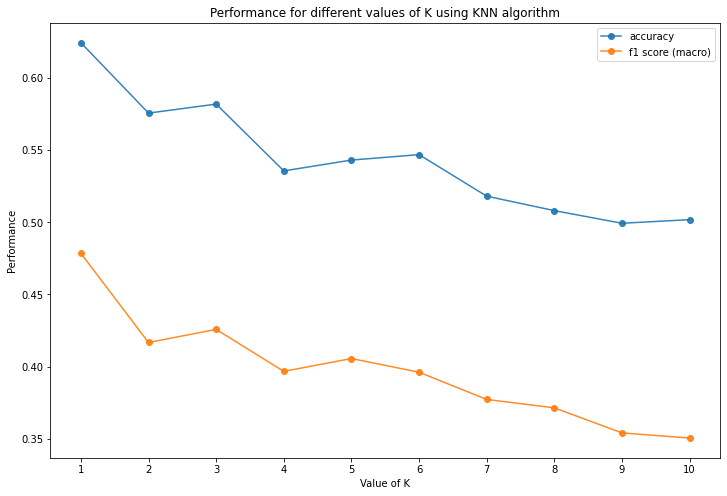

In [ ]:
plt.plot(
    k_values, 
    knn_accuracies, 
    '-o',
    alpha=0.9,
    label='accuracy'
)
plt.plot(
    k_values, 
    knn_f1_scores, 
    '-o',
    alpha=0.9,
    label='f1 score (macro)'
)

plt.legend()
plt.xticks(k_values)
plt.xlabel('Value of K')
plt.ylabel('Performance')
plt.title('Performance for different values of K using KNN algorithm')

### SVM

In [ ]:
svm_accuracies = []
svm_f1_scores = []

c_values = [1, 2.5, 5, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    for c in c_values:
        svm = make_pipeline(StandardScaler(), SVC(kernel=kernel, C=c, degree=4, coef0=0.01, random_state=2000, max_iter = 5000))
        svm.fit(x_train, y_train)
        
        score = svm.score(x_test, y_test)
        svm_accuracies.append(score)

        f1_score_ = f1_score(y_test, svm.predict(x_test), average='macro')
        svm_f1_scores.append(f1_score_)

        print(f'C={c:02.1f}, Kernel={kernel:8} -->   Accuracy={score*100:.3f}%, F1 score: {f1_score_:.3f}')
    print()


C=1.0, Kernel=linear   -->   Accuracy=63.079%, F1 score: 0.486
C=2.5, Kernel=linear   -->   Accuracy=63.079%, F1 score: 0.486
C=5.0, Kernel=linear   -->   Accuracy=63.079%, F1 score: 0.486
C=10.0, Kernel=linear   -->   Accuracy=63.079%, F1 score: 0.486

C=1.0, Kernel=poly     -->   Accuracy=49.061%, F1 score: 0.340
C=2.5, Kernel=poly     -->   Accuracy=52.816%, F1 score: 0.380
C=5.0, Kernel=poly     -->   Accuracy=53.442%, F1 score: 0.383
C=10.0, Kernel=poly     -->   Accuracy=53.442%, F1 score: 0.383

C=1.0, Kernel=rbf      -->   Accuracy=65.707%, F1 score: 0.491
C=2.5, Kernel=rbf      -->   Accuracy=66.708%, F1 score: 0.518
C=5.0, Kernel=rbf      -->   Accuracy=66.834%, F1 score: 0.517
C=10.0, Kernel=rbf      -->   Accuracy=66.834%, F1 score: 0.516

C=1.0, Kernel=sigmoid  -->   Accuracy=61.202%, F1 score: 0.447
C=2.5, Kernel=sigmoid  -->   Accuracy=62.703%, F1 score: 0.478
C=5.0, Kernel=sigmoid  -->   Accuracy=61.452%, F1 score: 0.472
C=10.0, Kernel=sigmoid  -->   Accuracy=59.324%, F

Text(0.5, 1.0, 'Performance for different hyperparameters using SVM algorithm')

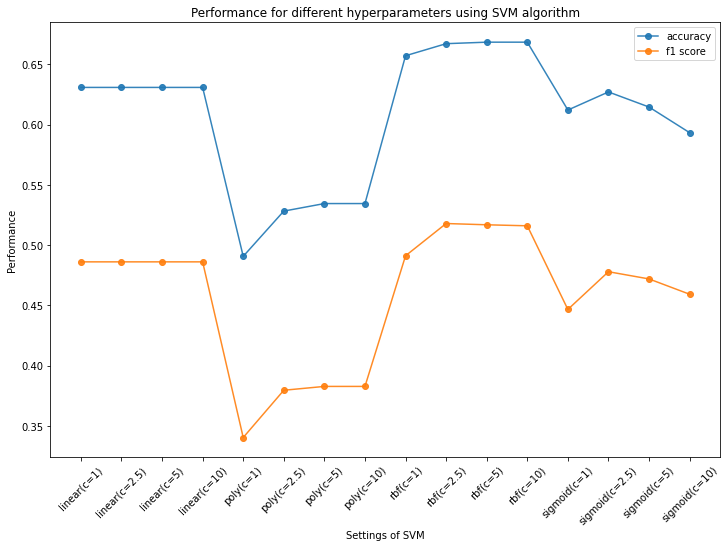

In [ ]:
plt.plot(
    [f'{k}(c={c})' for k in kernels for c in c_values], 
    svm_accuracies, 
    '-o',
    alpha=0.9,
    label='accuracy'
)

plt.plot(
    [f'{k}(c={c})' for k in kernels for c in c_values], 
    svm_f1_scores, 
    '-o',
    alpha=0.9,
    label='f1 score'
)

plt.legend()
plt.xticks([f'{k}(c={c})' for k in kernels for c in c_values], rotation=45)
plt.xlabel('Settings of SVM')
plt.ylabel('Performance')
plt.title('Performance for different hyperparameters using SVM algorithm')

### Neural network (perceptron)

In [ ]:
perceptron_accuracies = []
perceptron_f1_scores = []

perceptron = make_pipeline(StandardScaler(), Perceptron(
    penalty='l1',
    eta0=0.3,
    random_state=2000
))
perceptron.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron',
                 Perceptron(eta0=0.3, penalty='l1', random_state=2000))])

In [ ]:
score = perceptron.score(x_test, y_test)
perceptron_accuracies.append(score)
print(score)

f1_score_ = f1_score(y_test, perceptron.predict(x_test), average='macro')
perceptron_f1_scores.append(f1_score_)
print(f1_score_)

0.571964956195244
0.43223037152512295


### Multilayer perceptron (MLP)

In [ ]:
hidden_layers_sizes = [
    (100,),
    (embeddings.shape[1],),
    (128, 64,),
    (embeddings.shape[1], 64),
    (embeddings.shape[1], 128, 64),
    (embeddings.shape[1], 128, 64, 32)
]

mlp_accuracies = []
mlp_f1_scores = []
for hidden_layers_size in hidden_layers_sizes:
    mlp = make_pipeline(MinMaxScaler((-1,1)), 
        MLPClassifier(
            activation='relu',
            hidden_layer_sizes=hidden_layers_size,
            max_iter=1000,
            random_state=2000
        )
    )
    mlp.fit(x_train, y_train)

    score = mlp.score(x_test, y_test)
    mlp_accuracies.append(score)

    f1_score_ = f1_score(y_test, mlp.predict(x_test), average='macro')
    mlp_f1_scores.append(f1_score_)

    print(f'Number of hidden layers={len(hidden_layers_size)}, Size of hidden layers={hidden_layers_size} -->   Accuracy={score*100:.3f}%, F1 score: {f1_score_:.3f}')

Number of hidden layers=1, Size of hidden layers=(100,) -->   Accuracy=62.078%, F1 score: 0.460
Number of hidden layers=1, Size of hidden layers=(384,) -->   Accuracy=64.706%, F1 score: 0.487
Number of hidden layers=2, Size of hidden layers=(128, 64) -->   Accuracy=63.830%, F1 score: 0.485
Number of hidden layers=2, Size of hidden layers=(384, 64) -->   Accuracy=62.954%, F1 score: 0.473
Number of hidden layers=3, Size of hidden layers=(384, 128, 64) -->   Accuracy=62.578%, F1 score: 0.480
Number of hidden layers=4, Size of hidden layers=(384, 128, 64, 32) -->   Accuracy=61.327%, F1 score: 0.452


Text(0.5, 1.0, 'Performance for different hidden layer(s) using MLP algorithm')

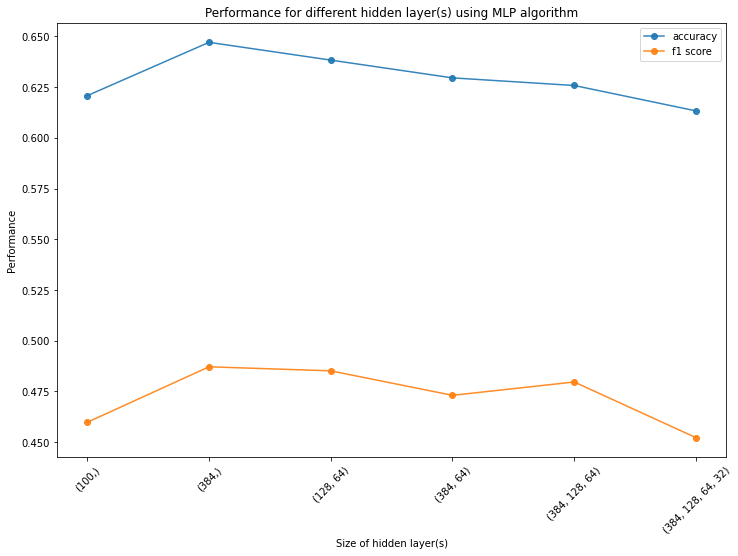

In [ ]:
plt.plot(
    [f'{size}' for size in hidden_layers_sizes], 
    mlp_accuracies, 
    '-o',
    alpha=0.9,
    label='accuracy'
)

plt.plot(
    [f'{size}' for size in hidden_layers_sizes], 
    mlp_f1_scores, 
    '-o',
    alpha=0.9,
    label='f1 score'
)

plt.legend()
plt.xticks([f'{size}' for size in hidden_layers_sizes], rotation=45)
plt.xlabel('Size of hidden layer(s)')
plt.ylabel('Performance')
plt.title('Performance for different hidden layer(s) using MLP algorithm')

### Compare different classification algortim results

In [ ]:
algorithms = [
    'KNN',
    'SVM',
    'Percptron',
    'MLP'
]

In [ ]:
best_raccuracy_per_algorithm = [
    np.max(knn_accuracies),
    np.max(svm_accuracies),
    np.max(perceptron_accuracies),
    np.max(mlp_accuracies),
]

In [ ]:
best_f1_score_per_algorithm = [
    np.max(knn_f1_scores),
    np.max(svm_f1_scores),
    np.max(perceptron_f1_scores),
    np.max(mlp_f1_scores),
]

Text(0.5, 1.0, 'Performance for different classification algorithms')

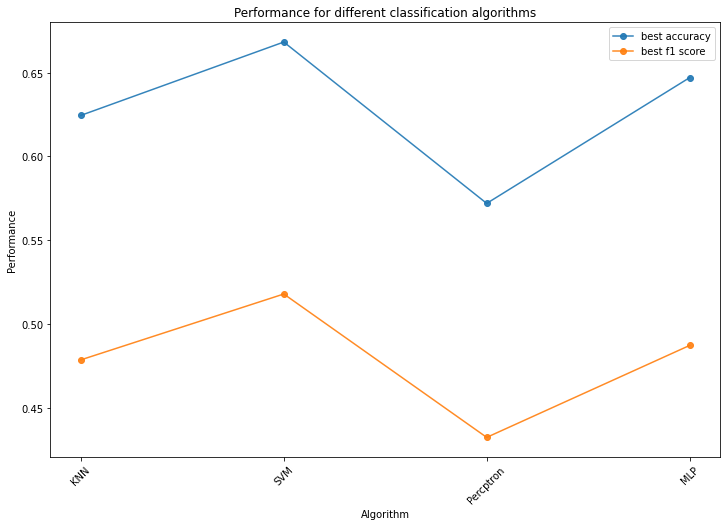

In [ ]:
plt.plot(
    algorithms, 
    best_raccuracy_per_algorithm, 
    '-o',
    alpha=0.9,
    label='best accuracy'
)

plt.plot(
    algorithms, 
    best_f1_score_per_algorithm, 
    '-o',
    alpha=0.9,
    label='best f1 score'
)

plt.legend()
plt.xticks(algorithms, rotation=45)
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Performance for different classification algorithms')